In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from currency_converter import CurrencyConverter
sns.set()

In [11]:
rio = pd.read_csv('../classifying/rio_normalized.csv')
mumbai = pd.read_csv('../classifying/mumbai_normalized.csv')
hyderabad = pd.read_csv('../classifying/hyderabad_normalized.csv')

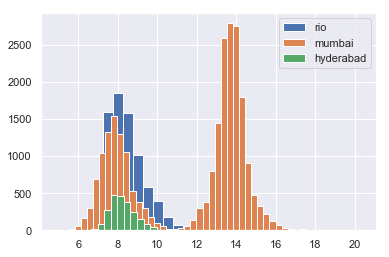

In [12]:
rio['price'].apply(np.log).hist(bins=20, label='rio')
mumbai['price'].apply(np.log).hist(bins=50, label='mumbai')
hyderabad['price'].apply(np.log).hist(bins=10, label='hyderabad')
plt.legend();

## Bootstrapping

In [13]:
def bootstrap(df):
    print(df.isna().sum().sum(), 'nans dropped')
    df.dropna(inplace=True)
    out = pd.concat([df, df[df['class'] == 1].sample(
                     df['class'].value_counts()[0] - df['class'].value_counts()[1],
                     replace = True)]).reset_index().drop(columns='index')
    print(len(out)-len(df), 'rows added')
    return out

In [14]:
rio_boot = bootstrap(rio)
mumbai_boot = bootstrap(mumbai)
hyderabad_boot = bootstrap(hyderabad)

2319 nans dropped
5543 rows added
53 nans dropped
22503 rows added
739 nans dropped
1464 rows added


## modeling

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

In [16]:
def xcity_pred(train, test):
    
    
    if train.equals(test):
        x = train[['price']]
        y = train['class']
        x_train, x_test, y_train, y_test = train_test_split(x, y, )
    else:
        x_train = train[['price']]
        y_train = train['class']
        x_test = test[['price']]
        y_test = test['class']
        
    
    rf = RandomForestClassifier(n_estimators=10)
    rf.fit(x_train, y_train)
    print('train:', rf.score(x_train, y_train), '| test:', rf.score(x_test, y_test))
    

In [17]:
cities = {'rio': rio, 'mumbai': mumbai, 'hyderabad': hyderabad}

for train_name, train_df in cities.items():
    for test_name, test_df in cities.items():
        print(f'train: {train_name} | test: {test_name}')
        xcity_pred(train_df, test_df)
        print('')

train: rio | test: rio
train: 0.960078964685238 | test: 0.9453947368421053

train: rio | test: mumbai
train: 0.956736305313374 | test: 0.9605474047589693

train: rio | test: hyderabad
train: 0.9569008060536273 | test: 0.9704370179948586

train: mumbai | test: rio
train: 0.970944807463116 | test: 0.942918243132094

train: mumbai | test: mumbai
train: 0.9726012384240232 | test: 0.9472386587771203

train: mumbai | test: hyderabad
train: 0.9699995890354662 | test: 0.9248071979434447

train: hyderabad | test: rio
train: 0.9710796915167095 | test: 0.955749300871854

train: hyderabad | test: mumbai
train: 0.9710796915167095 | test: 0.9622734558007644

train: hyderabad | test: hyderabad
train: 0.9665809768637532 | test: 0.9794344473007712

